## Mapping Molecular Hamiltonians to Qubit Operators with Bravyi-Kitaev Transformation

In the realm of quantum computing, accurately representing molecular Hamiltonians on quantum hardware is a foundational challenge in quantum chemistry simulations. Traditionally, the Jordan-Wigner (JW) transformation has been utilized to map fermionic operators to qubit operators, but with the scaling of quantum systems, more efficient methods are sought. One such method, known for its advantages in reducing qubit requirements, is the **Bravyi-Kitaev (BK) transformation**. 

The Bravyi-Kitaev transformation provides an alternative method for encoding fermionic creation and annihilation operators, which describe molecular interactions, into qubit operators. Unlike the Jordan-Wigner transformation, which encodes the occupancy of each fermionic mode into a single qubit, the Bravyi-Kitaev approach optimally balances local and global information. This is achieved through a logarithmic dependence on the number of fermions, allowing for more efficient scaling with large systems. 

The key advantage of the Bravyi-Kitaev method lies in how it addresses the number of qubits and gate operations needed for quantum chemistry simulations. In comparison to Jordan-Wigner, BK reduces the overhead by efficiently distributing the fermionic occupation information among qubits. This results in a lower qubit count and fewer quantum gates required to simulate large molecules, which is crucial when dealing with quantum systems with limited coherence times.

For engineers working in quantum computing, particularly those involved in **quantum chemistry simulations** and **electronic structure calculations**, the Bravyi-Kitaev transformation enables more scalable and error-resilient simulations. It is especially relevant in quantum algorithms like the **Variational Quantum Eigensolver (VQE)** and **Quantum Phase Estimation (QPE)**, where mapping Hamiltonians to qubits plays a critical role in determining molecular energies. 

As quantum hardware advances, the need for more efficient mappings becomes increasingly crucial. The Bravyi-Kitaev transformation is expected to play a key role in future developments of quantum algorithms, particularly as researchers strive to simulate increasingly complex molecular systems. With reduced qubit and gate overhead, it opens the door to practical quantum simulations of real-world molecules, such as proteins and catalysts, in the coming years.

Bravyi-Kitaev transformation offers a more efficient pathway for mapping molecular Hamiltonians to qubit operators. Its relevance continues to grow as quantum hardware progresses, and its use in quantum chemistry simulations will likely lead to groundbreaking discoveries in fields such as **material science**, **drug discovery**, and **renewable energy solutions**. 

The Bravyi-Kitaev transformation establishes a correspondence between fermionic operators and qubit operators. One of the key features of this transformation is that it reduces the locality of the operators. The transformation for the fermionic creation operator $c^\dagger_j$ and annihilation operator $c_j$ can be written as:

$$
c_j^\dagger = \frac{1}{2} \left( X_j - i Y_j \right) \prod_{k < j} Z_k
$$

$$
c_j = \frac{1}{2} \left( X_j + i Y_j \right) \prod_{k < j} Z_k
$$

Where $X_j$, $Y_j$, and $Z_j$ are the Pauli matrices acting on the $j$-th qubit.


In [1]:
# Import necessary libraries from Qiskit and visualizations
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_paulivec
from qiskit.quantum_info import Statevector, partial_trace
from qiskit_aer import AerSimulator
# Bravyi-Kitaev Transformation requires Qubit Operators, simulating molecular Hamiltonians
from qiskit_nature.second_q.mappers import BravyiKitaevMapper
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.circuit.library import HartreeFock
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define a simple Hamiltonian (you can adjust this based on the actual molecular simulation)
fer_op = FermionicOp({'+_0 -_0': 1.0, '+_1 -_1': 0.5})

bk_mapper = BravyiKitaevMapper()
qubit_op = bk_mapper.map(fer_op)

In [3]:
# Prepare a basic Hartree-Fock state with the Hartree-Fock circuit
num_spin_orbitals = 2
num_particles = (1, 1)  # 1 alpha and 1 beta electron
hf_circuit = HartreeFock(num_spin_orbitals, num_particles, qubit_mapper=bk_mapper)

In [4]:
# Ensure the quantum circuit has enough qubits for the Hartree-Fock state
qc = QuantumCircuit(hf_circuit.num_qubits)  # Ensure enough qubits in the main circuit

In [5]:
# Compose the Hartree-Fock circuit into the quantum circuit
qc.compose(hf_circuit, inplace=True)

In [6]:
# Add some gates for visualization purposes (before measurements)
qc.h(0)
qc.cx(0, 1)

In [7]:
# Use AerSimulator for simulation (before adding measurement)
simulator = AerSimulator()

In [8]:
# Extract statevector for visualizations
state = Statevector.from_instruction(qc)

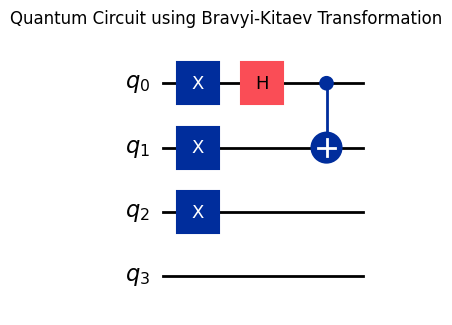

In [9]:
# Draw the Quantum Circuit
qc.draw(output='mpl')
plt.title("Quantum Circuit using Bravyi-Kitaev Transformation")
plt.show()

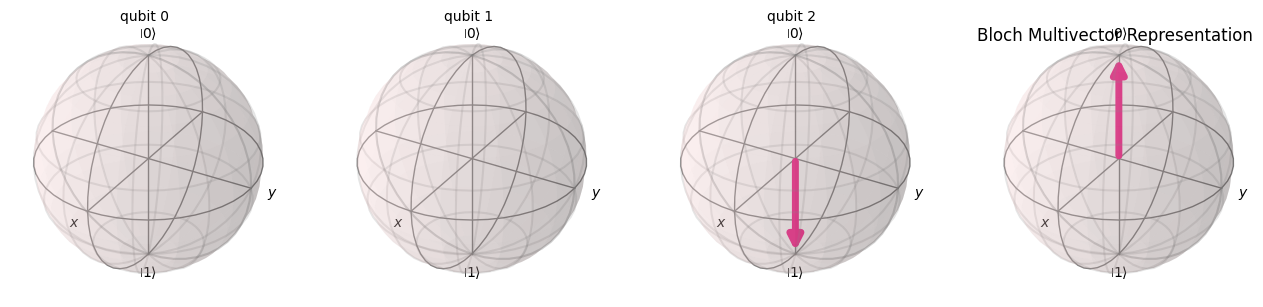

In [10]:
# Bloch Multivector Visualization 
plot_bloch_multivector(state)
plt.title("Bloch Multivector Representation")
plt.show()

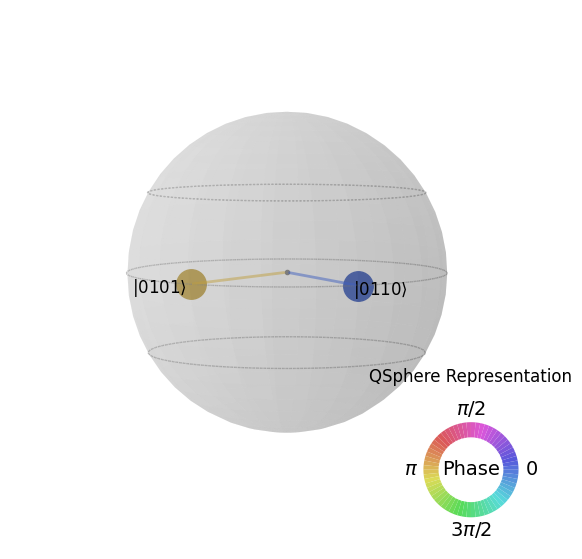

In [11]:
# QSphere Visualization 
plot_state_qsphere(state)
plt.title("QSphere Representation")
plt.show()

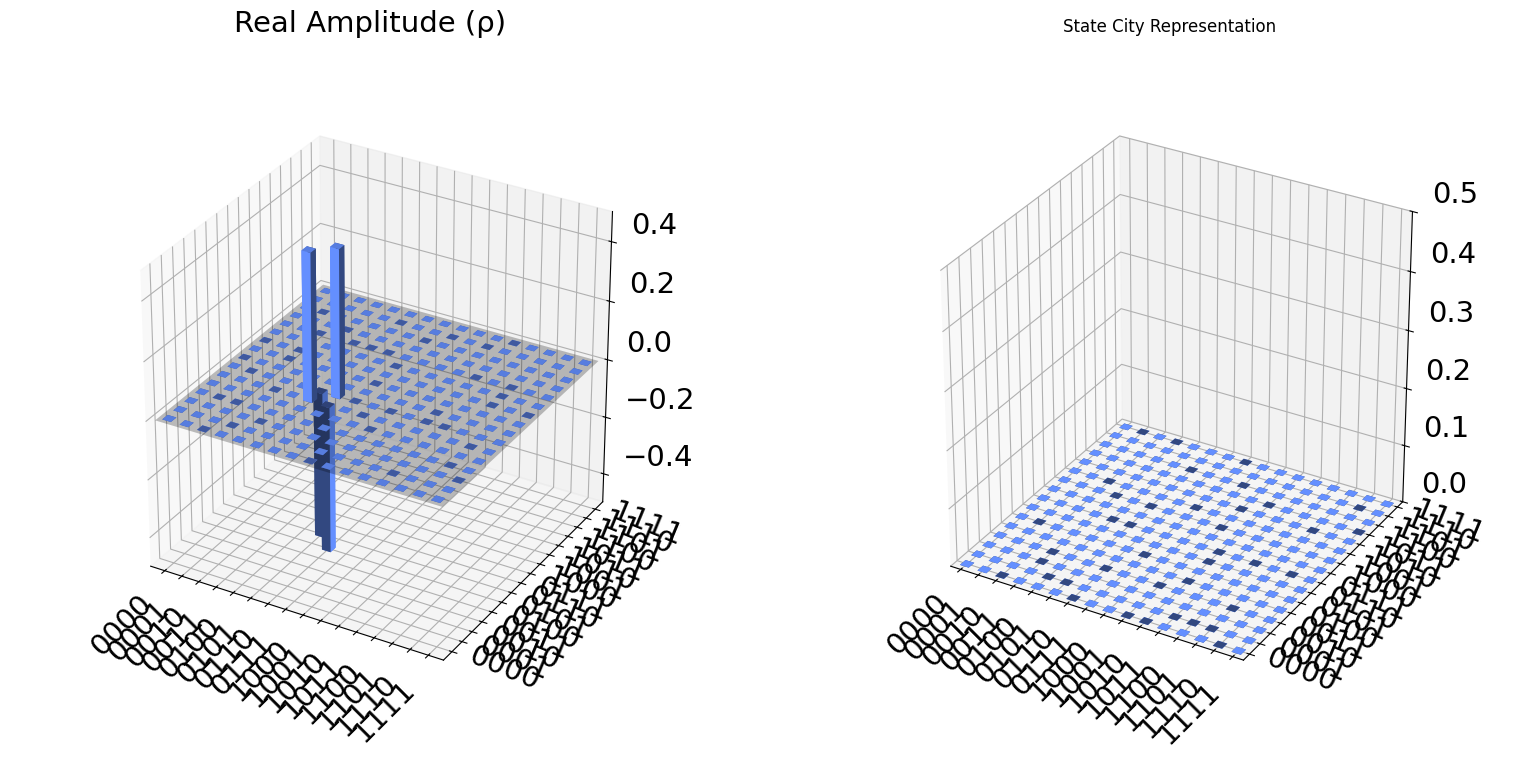

In [12]:
# State City Visualization 
plot_state_city(state)
plt.title("State City Representation")
plt.show()

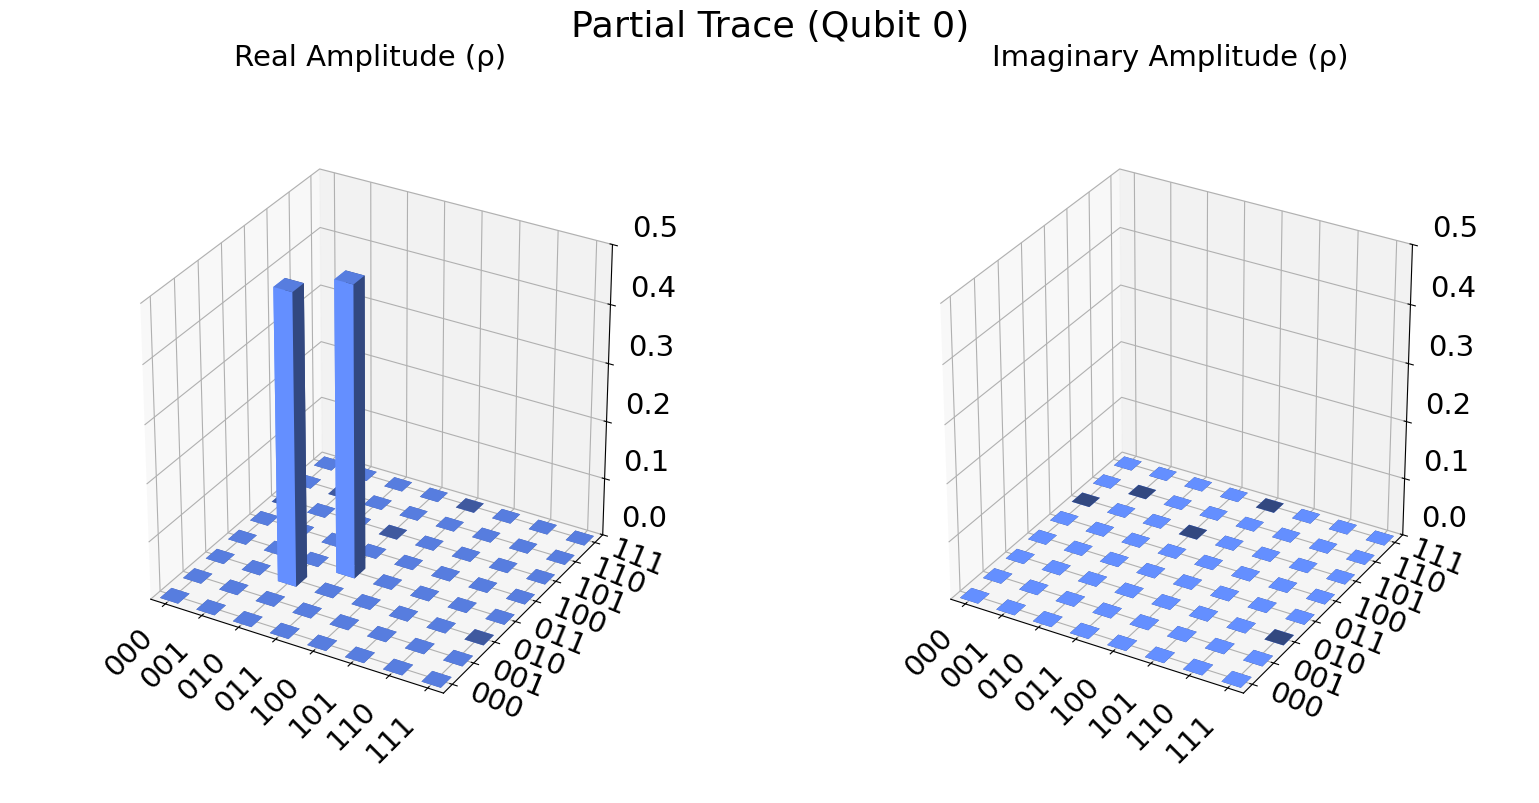

In [13]:
# Partial Trace Visualization (Tracing out one qubit)
rho = partial_trace(state, [1])  # Trace out the second qubit 
plot_state_city(rho, title="Partial Trace (Qubit 0)")
plt.show()

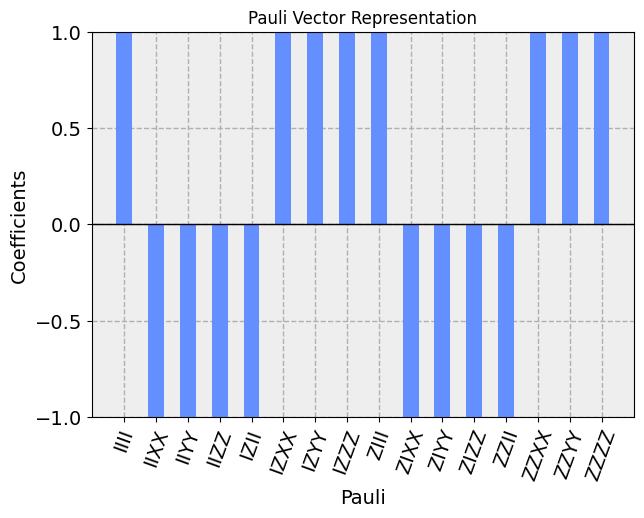

In [14]:
# 6. Pauli Vector Visualization 
plot_state_paulivec(state)
plt.title("Pauli Vector Representation")
plt.show()

In [15]:
# Add measurements 
qc.measure_all()

In [16]:
# Run the simulation (after adding measurement) and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)

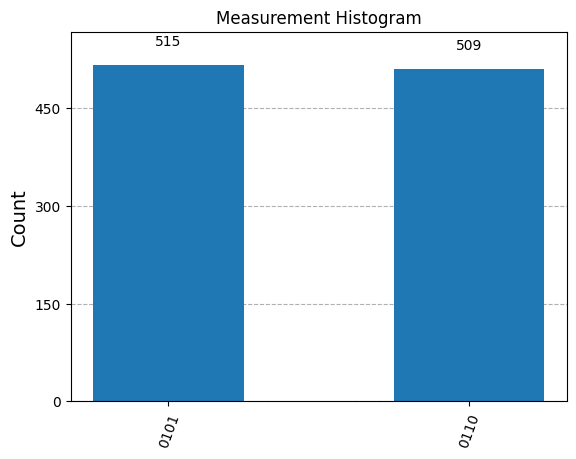

In [17]:
# Histogram visualization
plot_histogram(counts)
plt.title("Measurement Histogram")
plt.show()